In [1]:
%matplotlib inline


# Contour Demo

Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also the :doc:`contour image example
</gallery/images_contours_and_fields/contour_image>`.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

Create a simple contour plot with labels using default colors.  The inline
argument to clabel will control whether the labels are draw over the line
segments of the contour, removing the lines beneath the label.



In [3]:
df = pd.read_csv('data.csv')
print(df)

           x       y     H
0        5.0    -5.0 -6.35
1       15.0    -5.0 -6.35
2       25.0    -5.0 -6.35
3       35.0    -5.0 -6.35
4       45.0    -5.0 -6.35
...      ...     ...   ...
49995  955.0 -5000.0 -6.25
49996  965.0 -5000.0 -6.25
49997  975.0 -5000.0 -6.25
49998  985.0 -5000.0 -6.24
49999  995.0 -5000.0 -6.24

[50000 rows x 3 columns]


In [4]:
df1 = df.to_numpy()
df1

array([[    5.  ,    -5.  ,    -6.35],
       [   15.  ,    -5.  ,    -6.35],
       [   25.  ,    -5.  ,    -6.35],
       ...,
       [  975.  , -5000.  ,    -6.25],
       [  985.  , -5000.  ,    -6.24],
       [  995.  , -5000.  ,    -6.24]])

In [13]:
#x = df1[:, [0]]
#y = df1[:, [1]]
z = df1[:, [2]]

In [14]:
z_2d = np.reshape(z, (500, 100))
z_2d

array([[-6.35, -6.35, -6.35, ..., -6.36, -6.36, -6.36],
       [-6.35, -6.35, -6.35, ..., -6.36, -6.36, -6.36],
       [-6.35, -6.35, -6.35, ..., -6.36, -6.36, -6.36],
       ...,
       [-6.25, -6.26, -6.26, ..., -6.25, -6.25, -6.25],
       [-6.25, -6.25, -6.25, ..., -6.25, -6.25, -6.24],
       [-6.25, -6.25, -6.25, ..., -6.25, -6.24, -6.24]])

Text(0.5, 1.0, 'Stream Flow Depletion mapping')

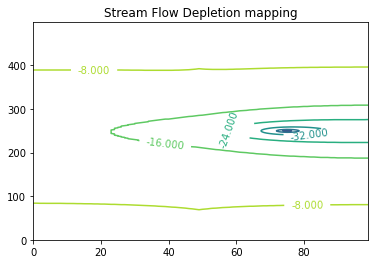

In [26]:
fig, ax = plt.subplots()
x = np.arange(0, 100)
y = np.arange(0, 500)
X, Y = np.meshgrid(x, y)
CS = ax.contour(X, Y, z_2d)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Stream Flow Depletion mapping')

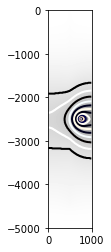

In [49]:
fig, ax = plt.subplots()
im = ax.imshow(z_2d, interpolation='bilinear', origin='lower',
               cmap=cm.gray, extent=(0, 1000, -5000, 0))
levels = np.arange(-90, -10, 2.5)
CS = ax.contour(z_2d, levels, origin='lower', cmap='flag', extend='both',
                linewidths=2, extent=(0, 1000, -5000, 0))

plt.show()

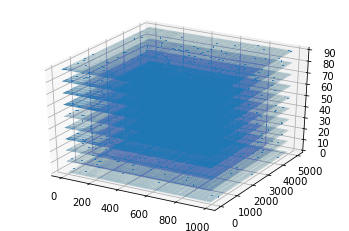

In [56]:
ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z_2d = np.meshgrid(np.arange(0, 1000, 10),
                      np.arange(0, 5000, 10),
                      np.arange(0, 100, 10))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z_2d)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z_2d)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z_2d))

ax.quiver(x, y, z_2d, u, v, w, length=0.1, normalize=True)

plt.show()